<a href="https://colab.research.google.com/github/Tatan16/EDA-venda-produtos-eletronicos/blob/main/analise_de_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Cruzeiro_do_sul/Projeto_Cruzeiro_do_sul_2/Vendas_eletronicos.csv")

In [3]:
display(df)

,Unnamed: 0,Vendas,Dia,Data,Valor da Venda em R$
0,0,55.0,Segunda,2023-10-31,971
1,1,49.0,Sábado,2023-09-11,648
2,2,56.0,Sexta,2023-05-20,164
3,3,65.0,Segunda,2023-02-06,499
4,4,48.0,Quarta,2023-06-09,395
...,...,...,...,...,...
95,95,35.0,Segunda,2023-10-07,750
96,96,53.0,Quinta,2023-04-24,483
97,97,53.0,Quinta,2023-10-15,126
98,98,50.0,Segunda,2023-12-08,839


In [4]:
# Separar vendas por finais de semana e dias da semana

weekend_sales = df[df["Dia"].isin(["Sábado", "Domingo"])][["Vendas", "Data", "Valor da Venda em R$"]]

weekday_sales = df[df["Dia"].isin(["Segunda", "Terça", "Quarta",
"Quinta", "Sexta"])][["Vendas", "Data", "Valor da Venda em R$"]]

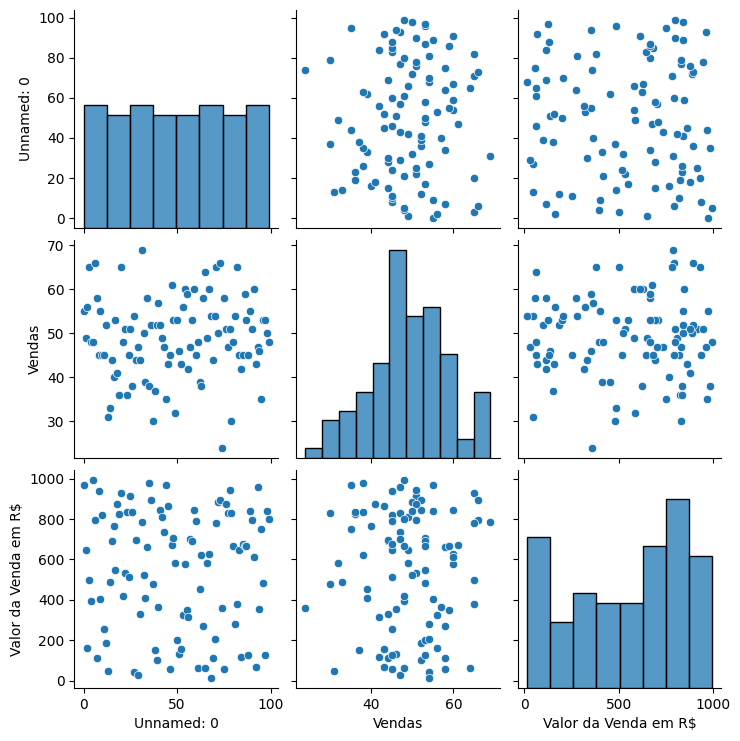

In [5]:
# Criando um grafico geral de Vendas pelo valor de estas.
sns.pairplot(df)
plt.show()

In [6]:
# Criando um grafico de caixas para identificar possiveis (oulier)
px.box(df, y="Vendas", color="Dia")

## Neste Grafico de caixas podemos identificar um valor fora do quartil inferior do dia QUINTA, este seria um oulier

In [7]:
weekend_sort =  weekend_sales.sort_values(by="Data")
weekday_sort =  weekday_sales.sort_values(by="Data")
# Criando os trace(linhas)
trace1 = go.Scatter(x=weekday_sort["Data"], y=weekday_sort["Vendas"], mode="lines", name="Vendas Dia de Semana")
trace2 = go.Scatter(x=weekend_sort["Data"], y=weekend_sort["Vendas"], mode="lines", name="Vendas Finais de Semana")

# Criando o Layout
layout = go.Layout(title="Grafico de",
                   xaxis=dict(title="Data"),
                   yaxis=dict(title="Vendas"))

# Criando a figura para ser visualizada
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

## No grafico acima podemos Visualizar as Vendas ao longo do tempo tanto nos Finais de Semana e Dias de Semana

In [8]:
weekend_sales.describe()

,Vendas,Valor da Venda em R$
count,25.000000,25.000000
mean,47.280000,537.920000
std,10.366292,292.568926
min,30.000000,48.000000
25%,41.000000,351.000000
50%,49.000000,584.000000
75%,55.000000,809.000000
max,69.000000,886.000000


In [9]:
# Criando Grafico de Barras para saber qual dia teve mais Vendas em Geral
px.bar(df, x="Dia", y="Vendas", color="Dia")

In [10]:
# Somando todas as Vendas dos finais de semana e dias de semana
weekend_vendas = weekend_sales["Vendas"].sum()
weekday_vendas = weekday_sales["Vendas"].sum()

# Grafico de barra do total que foi Vendido nos Dias de Semana e Fianl de Semana
px.bar(x=["Total de Vendas Dias de Semana", "Total de Vendas Finais de Semana"], y=[weekday_vendas, weekend_vendas], color=["Finais de Semana", "Dias de Semana"],
       labels={
      "x":"Dias das Vendas",
      "y":"Total de Vendas"})


## Com este grafico chegamos a conclusão de que há diferença sim entre as Vendas de Final de Semana e as Vendas dos Dias de Semana, portanto a Hipotese (0) ficaria anulada sendo assim a Hipotese (1) a valida.

# E respondendo a pergunta:

### "As vendas são maiores nos finais de semana em comparação com os dias da semana?"

### Não, as Vendas nos Finais de Semana não são maiores que as Vendas dos Dia de Semana, ao contrario, as Vendas de Dia de Semana são quase 3 vezes maiores que as Vendas de Final d Semana.